In [1]:
import os
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
CURRENT_DIR = Path.cwd()
PARENT_DIR = CURRENT_DIR.parent
DATA_DIR = PARENT_DIR / "T00_data" / "axial_force" / "post_welding"
print(CURRENT_DIR)
print(DATA_DIR)


c:\Users\admin\Coding\research\weld-ml\src\P02_data\T01_explore
c:\Users\admin\Coding\research\weld-ml\src\P02_data\T00_data\axial_force\post_welding


In [5]:
# List all files in the data directory
files = os.listdir(DATA_DIR)

In [ ]:
import re
# Extract the number from the filename
txt = files[2]

m = re.search(r'(\d+)', txt)
print(int(m.group(1)))

11


In [6]:
import csv


# Function to process the raw data into a structured list of 2-item lists
def process_csv_lines(file):
    processed_data = []
    # Use the csv reader to handle quotes and commas properly
    reader = csv.reader(file, delimiter=",")
    for row in reader:
        # A valid row should have at least 2 elements (key and value)
        if len(row) >= 2:
            # Join any extra elements back into the second column (the 'Value')
            key = row[0]
            value = ", ".join(row[1:])
            processed_data.append(
                [key, value.strip()]
            )  # Strip any leading/trailing space from value
    return processed_data


# with open(filepath, "r", encoding="utf-8") as file:
#     data = process_csv_lines(file)

# df = pd.DataFrame(data)
# df.rename(columns={0: "Parameter", 1: "Value"}, inplace=True)
# df["Parameter"] = df["Parameter"].str.strip().str.replace(":", "")
# df.set_index("Parameter", inplace=True)
# df.index.name = None
# df.columns = ["Value"]
# meta = df["Value"].iloc[:18]
# meta

In [ ]:
df_list = []
for file in files[:10]:
    filepath = DATA_DIR / file
    with open(filepath, "r", encoding="utf-8") as f:
        data = process_csv_lines(f)
    df = pd.DataFrame(data)
    df.rename(columns={0: "Parameter", 1: "Value"}, inplace=True)
    df["Parameter"] = df["Parameter"].str.strip().str.replace(":", "")
    df.set_index("Parameter", inplace=True)
    df.index.name = None
    df.columns = ["Value"]
    _meta = df["Value"].iloc[:18]
    _meta["filename"] = file
    df_list.append(_meta)

meta = pd.DataFrame(df_list)
meta

,DynoWare,Path,Filename,Config ID,Setup ID,Manipulated,Filename 1,Filename 2,Date,Time,Sampling rate [Hz],Measuring time [s],Delay time [s],Cycle time [s],Cycles,Samples per channel,Cycle interval,Cycle No,filename
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 1.dwd,Sample 1.cfg,0,0,,,"Wednesday, January 01, 2025",16:36:29,100,180,0,0,1,18001,0,1,Sample 1.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 10.dwd,Sample 10.cfg,0,0,,,"Wednesday, January 01, 2025",18:28:07,100,180,0,0,1,18001,0,1,Sample 10.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 11.dwd,Sample 11.cfg,0,0,,,"Wednesday, January 01, 2025",18:38:07,100,180,0,0,1,18001,0,1,Sample 11.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 12.dwd,Sample 12.cfg,0,0,,,"Wednesday, January 01, 2025",18:48:28,100,180,0,0,1,18001,0,1,Sample 12.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 13.dwd,Sample 13.cfg,0,0,,,"Thursday, January 02, 2025",13:33:46,100,180,0,0,1,18001,0,1,Sample 13.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 14.dwd,Sample 14.cfg,0,0,,,"Thursday, January 02, 2025",13:51:37,100,180,0,0,1,18001,0,1,Sample 14.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 15.dwd,Sample 15.cfg,0,0,,,"Thursday, January 02, 2025",13:59:13,100,180,0,0,1,18001,0,1,Sample 15.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 16.dwd,Sample 16.cfg,0,0,,,"Thursday, January 02, 2025",14:08:38,100,180,0,0,1,18001,0,1,Sample 16.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 17.dwd,Sample 17.cfg,0,0,,,"Thursday, January 02, 2025",14:17:21,100,180,0,0,1,18001,0,1,Sample 17.csv
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 18.dwd,Sample 18.cfg,0,0,,,"Thursday, January 02, 2025",14:26:04,100,180,0,0,1,18001,0,1,Sample 18.csv


In [8]:
meta

,DynoWare,Path,Filename,Config ID,Setup ID,Manipulated,Filename 1,Filename 2,Date,Time,Sampling rate [Hz],Measuring time [s],Delay time [s],Cycle time [s],Cycles,Samples per channel,Cycle interval,Cycle No
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 1.dwd,Sample 1.cfg,0,0,,,"Wednesday, January 01, 2025",16:36:29,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 10.dwd,Sample 10.cfg,0,0,,,"Wednesday, January 01, 2025",18:28:07,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 11.dwd,Sample 11.cfg,0,0,,,"Wednesday, January 01, 2025",18:38:07,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 12.dwd,Sample 12.cfg,0,0,,,"Wednesday, January 01, 2025",18:48:28,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 13.dwd,Sample 13.cfg,0,0,,,"Thursday, January 02, 2025",13:33:46,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 14.dwd,Sample 14.cfg,0,0,,,"Thursday, January 02, 2025",13:51:37,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 15.dwd,Sample 15.cfg,0,0,,,"Thursday, January 02, 2025",13:59:13,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 16.dwd,Sample 16.cfg,0,0,,,"Thursday, January 02, 2025",14:08:38,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 17.dwd,Sample 17.cfg,0,0,,,"Thursday, January 02, 2025",14:17:21,100,180,0,0,1,18001,0,1
Value,Version 3.2.2.0,D:\Parn (paper ML Weld)\Post welding\,Sample 18.dwd,Sample 18.cfg,0,0,,,"Thursday, January 02, 2025",14:26:04,100,180,0,0,1,18001,0,1


In [25]:
af = pd.read_csv(filepath, skiprows=18)
af = af.iloc[1:, :]
# Convert columns to numeric, coerce errors to NaN
af["Time"] = pd.to_numeric(af["Time"], errors="coerce")
af["Fx"] = pd.to_numeric(af["Fx"], errors="coerce")
af["Fy"] = pd.to_numeric(af["Fy"], errors="coerce")
af["Fz"] = pd.to_numeric(af["Fz"], errors="coerce")
af["Mz"] = pd.to_numeric(af["Mz"], errors="coerce")
af.set_index("Time", inplace=True)
af

,Mz,Fz,Fy,Fx
Time,,,,
0.00,0.208391,-0.488761,0.005548,0.003542
0.01,0.018746,-0.501055,0.000599,0.000022
0.02,0.207955,-0.489546,0.005526,0.003499
0.03,0.019183,-0.501055,0.000610,0.000022
0.04,0.207084,-0.488892,0.005548,0.003520
...,...,...,...,...
179.96,-0.342233,0.065569,-0.000174,-0.002845
179.97,-0.237601,0.071368,0.002093,-0.001101
179.98,-0.337873,0.066180,-0.000174,-0.002823


<Axes: title={'center': 'Axial Force over Time - Post Welding Sample 1'}, xlabel='Time (s)', ylabel='Axial Force (kN)'>

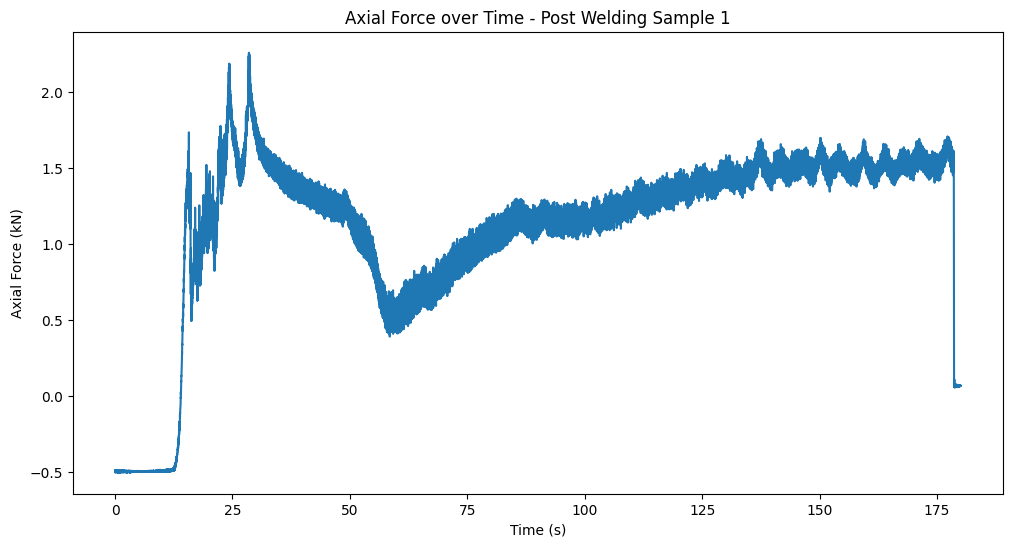

In [26]:
af["Fz"].plot(
    figsize=(12, 6),
    title="Axial Force over Time - Post Welding Sample 1",
    ylabel="Axial Force (kN)",
    xlabel="Time (s)",
)

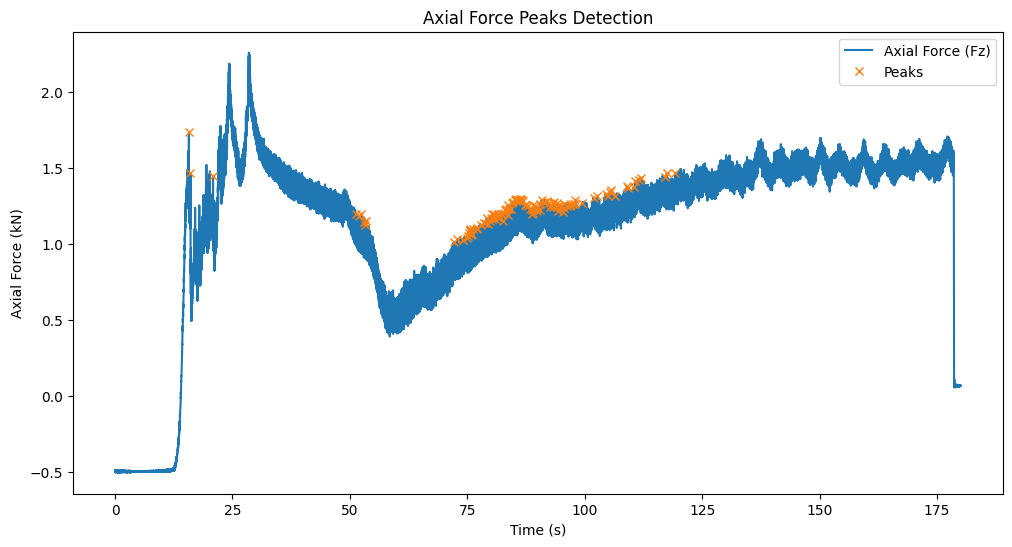

In [67]:
from scipy.signal import find_peaks  # pip install scipy

fpeaks, props  = find_peaks(af["Fz"], height=(1, None), threshold=0.15, rel_height=3)
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(af.index, af["Fz"], label="Axial Force (Fz)")
ax.set_title("Axial Force Peaks Detection")
ax.set_xlabel("Time (s)")
ax.set_ylabel("Axial Force (kN)")
ax.plot(af.index[fpeaks], af["Fz"].iloc[fpeaks], "x", label="Peaks")
ax.legend()
# ax.set_xlim([14, 18])

<Axes: xlabel='Time'>

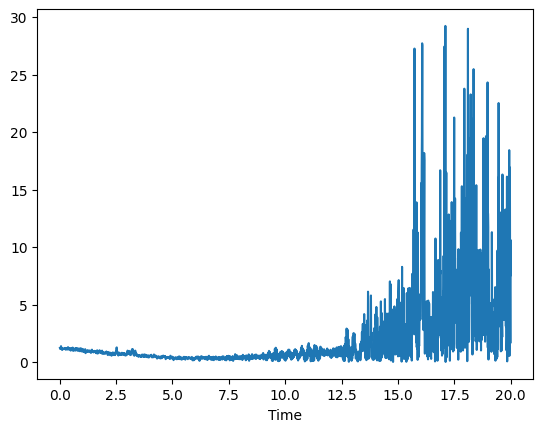

In [28]:
# Track the first data steep slope during the first few seconds
idxes = af.index[af.index <= 20]
# Plot the slope with time diff
slope = af["Fz"].loc[idxes].diff().abs() / af.index.to_series().diff()
slope.plot()


First steep slope at time 13.67 s with Fz = -0.168762 kN


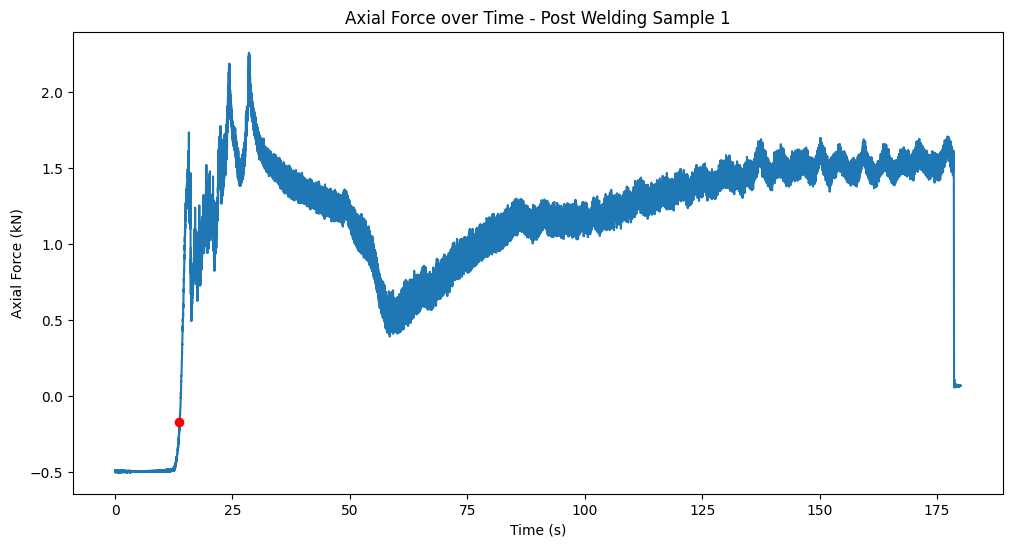

In [29]:
# Identify the first point where slope exceed a threshold

threshold = 5  # Define a threshold for steep slope
locs_steep = slope[slope > threshold]
locs_steep_idx = locs_steep.index[0]
locs_steep_value = af.loc[locs_steep_idx, "Fz"]
print(f"First steep slope at time {locs_steep_idx} s with Fz = {locs_steep_value} kN")

# Mark the max slope point on the original plot
ax = af["Fz"].plot(
    figsize=(12, 6),
    title="Axial Force over Time - Post Welding Sample 1",
    ylabel="Axial Force (kN)",
    xlabel="Time (s)",
)
ax.plot(
    locs_steep_idx,
    locs_steep_value,
    "ro",  # red dot
)

<Axes: xlabel='Time'>

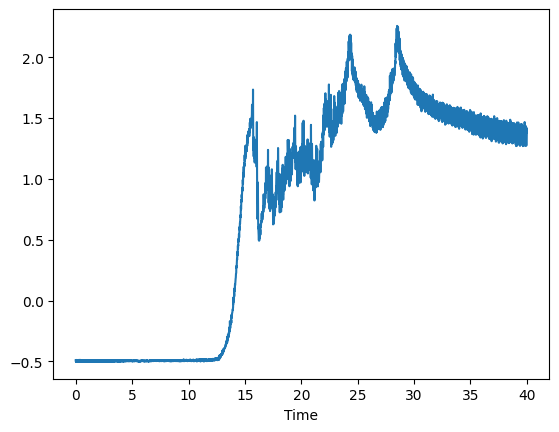

In [30]:
af[af.index < 40]["Fz"].plot()